# Facial Emotion Recognition using GPT-4o Vision capabilities

# Overview
GPT-4o incorporates both language processing and visual understanding. \ 
This multimodal capability allows the model to understand and generate content based on images as well as text. \ 
This can be used for a variety of applications, including image captioning, visual question answering, and generating detailed descriptions of visual content.

For more detailed examples, refer to the official documentation [GPT With Vision](https://learn.microsoft.com/en-us/azure/ai-services/openai/how-to/gpt-with-vision?tabs=rest%2Csystem-assigned%2Cresource)

### Using GPT-4o to Describe an Image
GPT-4o allows you to process and understand images along with text inputs. \
This example demonstrates how to send an image to the GPT-4o model and get a descriptive text output.

---
**Prerequisites** \
Access to Azure OpenAI resource for using the GPT-4o model.

#### 1. Display image we want to work with

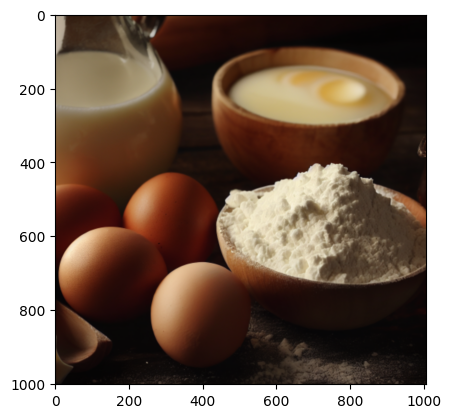

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_PATH = "./data/ingredients.png"

img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()


#### 2. Import helper libraries and setup configuration

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
from openai import AzureOpenAI

client = AzureOpenAI(
    api_key=os.getenv('AZURE_OPENAI_KEY'),  
    api_version=os.getenv('AZURE_OPENAI_API_VERSION'),
    base_url=f"{os.getenv('AZURE_OPENAI_ENDPOINT')}openai/deployments/{os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME')}",
)

#### 3. Create functions for image encoding and request handling

In [3]:
import base64
from mimetypes import guess_type

# Function to encode a local image into data URL 
def local_image_to_data_url(image_path):
    # Guess the MIME type of the image based on the file extension
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'  # Default MIME type if none is found

    # Read and encode the image file
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    # Construct the data URL
    return f"data:{mime_type};base64,{base64_encoded_data}"


In [4]:
def process_image_with_gpt4vo(image_path, system_message, user_message):
    """
    Encodes an image, prepares the payload, and sends a request to the GPT-4o API.

    Args:
        image_path (str): Path to the image file.
        system_message (str): System role message for the GPT-4o API.
        user_message (str): User role message for the GPT-4o API.

    Returns:
        str: The response content from the GPT-4o API.
    """
    data_url = local_image_to_data_url(image_path)
    response = client.chat.completions.create(
        model=os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME'),
        temperature=0,
        messages=[
            { "role": "system", "content": system_message },
            { "role": "user", "content": [  
                { 
                    "type": "text", 
                    "text": user_message 
                },
                { 
                    "type": "image_url",
                    "image_url": {
                        "url": data_url
                    }
                }
            ] } 
        ],
    )
    return response

#### 4. Prepare payload and send request

In [5]:
system_message = "You are an AI assistant that helps people find information."
user_message = "Describe this picture"
response = process_image_with_gpt4vo(IMAGE_PATH, system_message, user_message)
print(response.choices[0].message.content)


The picture depicts a collection of baking ingredients arranged on a wooden surface. There is a jug of milk, a bowl containing two cracked eggs, a bowl filled with flour, and several whole eggs. The lighting is warm and soft, creating a cozy and inviting atmosphere, typical of a kitchen setting. The ingredients are likely being prepared for a baking recipe.


### Using GPT-4o for Facial Emotion Recognition in an image

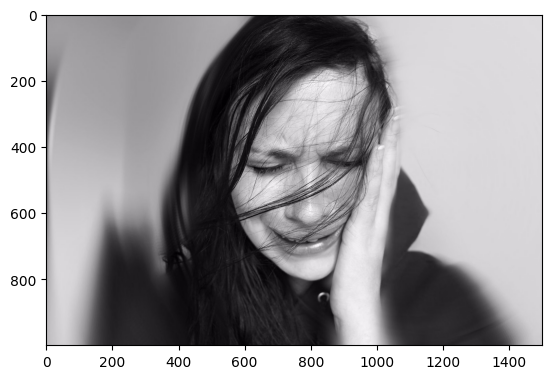

In [6]:
IMAGE_PATH = "./data/image_woman_1.jpg"

img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()

In [7]:
system_message = "You are an AI assistant that helps help psychologists and psychiatrists identify people's emotions from their faces."
user_message = "Describe the emotion of this person. Make it brief in one sentence."
response = process_image_with_gpt4vo(IMAGE_PATH, system_message, user_message)
print(response.choices[0].message.content)

The person appears to be experiencing distress or discomfort.


### Using GPT-4o for Facial Emotion Recognition in a video

#### 1. Load the video and display frames per second (FPS)

In [8]:
import cv2

VIDEO_PATH = "./data/mixkit-worried-and-sad-woman-hugging-a-cushion-4513-hd-ready.mp4"  # Replace with your video path

In [9]:

cap = cv2.VideoCapture(VIDEO_PATH)  # Replace with the actual video path
if not cap.isOpened():
    print("Error: Could not open video.")


fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Video FPS: {fps}")

Video FPS: 30.0


#### 2. Save one frame every second

We will save the frames in `data/output/{timestamp}` folder

In [10]:
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d_%H-%M-%S")
print(f"Current timestamp: {timestamp}")

Current timestamp: 2025-05-06_16-27-01


In [11]:
os.makedirs(f"./data/output/{timestamp}", exist_ok=True)

In [12]:
frame_interval = int(fps)  # Save one frame every second
frame_count = 0
frame_id = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_interval == 0:
        # Save the frame as an image
        cv2.imwrite(f"./data/output/{timestamp}/frame_{frame_id}.jpg", frame)
        frame_id += 1
    frame_count += 1

cap.release()
cv2.destroyAllWindows()

print(f"Extracted {frame_id} frames from the video.")

Extracted 12 frames from the video.


#### 3. Display preview of the saved frames

In [ ]:
fig, axes = plt.subplots(1, frame_id, figsize=(300, 100))
for i in range(frame_id):
    img = Image.open(f"./data/output/{timestamp}/frame_{i}.jpg")
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Frame {i}")
plt.show()

#### 4. Display the saved frames one by one

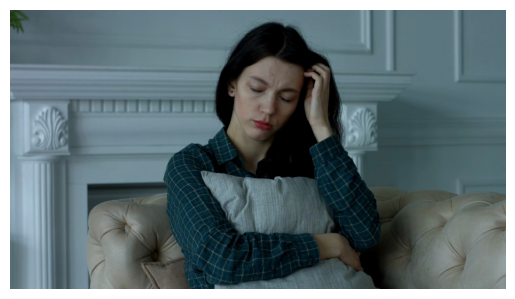

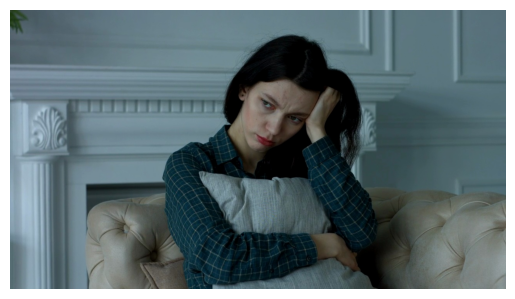

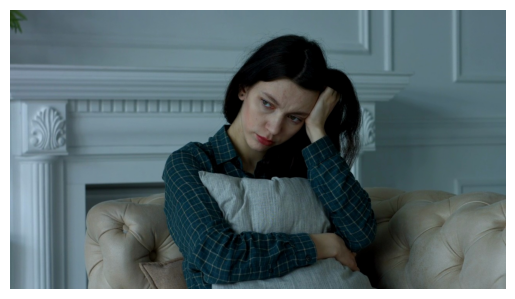

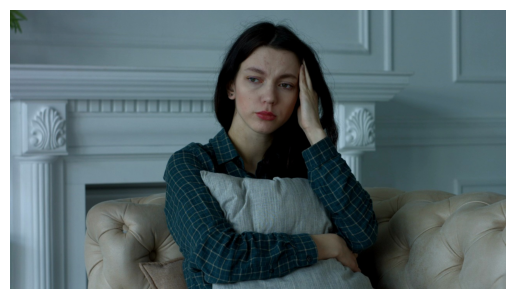

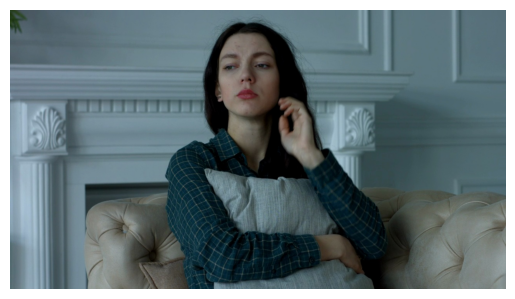

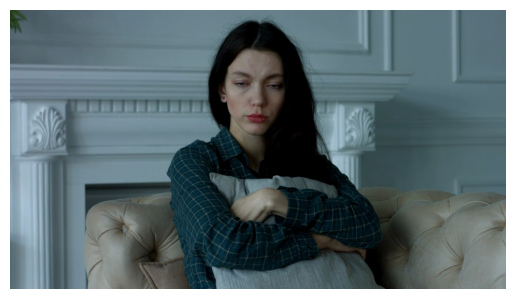

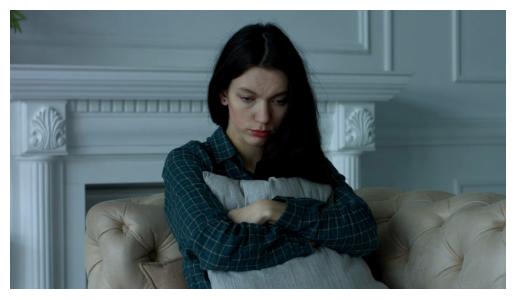

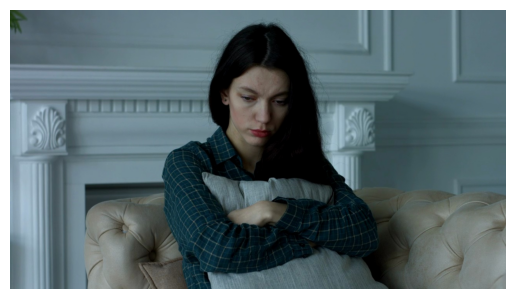

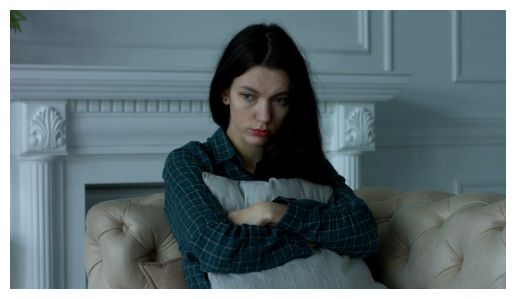

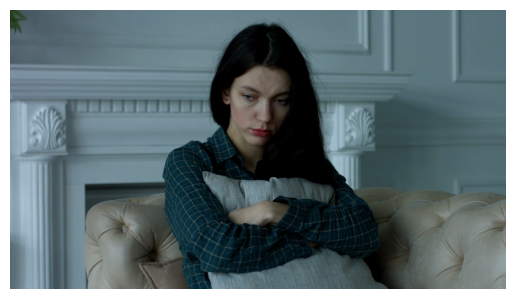

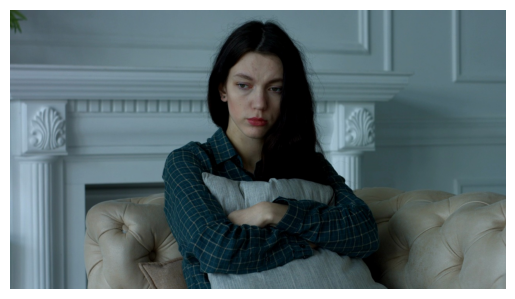

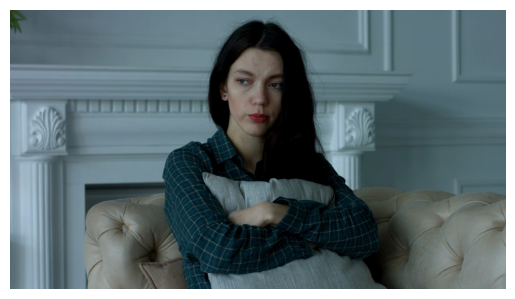

In [13]:
for i in range(frame_id):
    img = Image.open(f"./data/output/{timestamp}/frame_{i}.jpg")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#### 5. Send the frames to GPT-4o to get the Facial Emotion

In [14]:
# send the frames to the GPT-4o API
video_frames_emotions = []
for i in range(frame_id):
    IMAGE_PATH = f"./data/output/{timestamp}/frame_{i}.jpg"
    print(IMAGE_PATH)
    response = process_image_with_gpt4vo(IMAGE_PATH, system_message, user_message)
    result = response.choices[0].message.content
    print(result)
    video_frames_emotions.append(result)

./data/output/2025-05-06_16-27-01/frame_0.jpg
The person appears to be feeling contemplative or introspective.
./data/output/2025-05-06_16-27-01/frame_1.jpg
The person appears to be feeling distressed or overwhelmed.
./data/output/2025-05-06_16-27-01/frame_2.jpg
The person appears to be feeling distressed or overwhelmed.
./data/output/2025-05-06_16-27-01/frame_3.jpg
The person appears to be feeling distressed or overwhelmed.
./data/output/2025-05-06_16-27-01/frame_4.jpg
The person appears to be in a contemplative or reflective state, possibly feeling calm or introspective.
./data/output/2025-05-06_16-27-01/frame_5.jpg
The person appears to be feeling anxious or defensive, as indicated by their crossed arms and posture.
./data/output/2025-05-06_16-27-01/frame_6.jpg
The person appears to be feeling withdrawn or contemplative.
./data/output/2025-05-06_16-27-01/frame_7.jpg
The person appears to be feeling withdrawn or defensive, as indicated by their crossed arms and hunched posture.
./dat

#### 6. Save video frames emotions in a JSON file

In [15]:
import json

with open(f"./data/output/{timestamp}/video_frames_emotions.json", "w") as f:
    json.dump(video_frames_emotions, f, indent=4)
print(f"Saved video frames emotions to {timestamp}/video_frames_emotions.json")

Saved video frames emotions to 2025-05-06_16-27-01/video_frames_emotions.json


In [16]:
# print the content of the json file saved
with open(f"./data/output/{timestamp}/video_frames_emotions.json", "r") as f:
    video_frames_emotions = json.load(f)
    for i, emotion in enumerate(video_frames_emotions): 
        print(f"Frame {i}: {emotion}")

Frame 0: The person appears to be feeling contemplative or introspective.
Frame 1: The person appears to be feeling distressed or overwhelmed.
Frame 2: The person appears to be feeling distressed or overwhelmed.
Frame 3: The person appears to be feeling distressed or overwhelmed.
Frame 4: The person appears to be in a contemplative or reflective state, possibly feeling calm or introspective.
Frame 5: The person appears to be feeling anxious or defensive, as indicated by their crossed arms and posture.
Frame 6: The person appears to be feeling withdrawn or contemplative.
Frame 7: The person appears to be feeling withdrawn or defensive, as indicated by their crossed arms and hunched posture.
Frame 8: The person appears to be feeling withdrawn or defensive.
Frame 9: The person appears to be feeling sad or withdrawn, as indicated by their body language and posture.
Frame 10: The person appears to be feeling withdrawn or defensive, as indicated by their crossed arms and posture.
Frame 11: T